# Drawing molecules with Indigo

Exploring other cheminformatics toolkits besides the RDKit, I wanted to try EPAM Indigo. I was unable to find examples of drawing molecules in a Python Jupyter Notebook, so here's how to do that. It also demonstrates how to save molecular images to a file.

## Import and initialize Indigo modules

In [ ]:
from IPython.display import display, SVG, Image

Indigo works a little differently than the RDKit: With Indigo, you start by creating an instance of the class.

In [ ]:
from indigo import Indigo
from indigo.renderer import IndigoRenderer

In [ ]:
# Initialize Indigo and IndigoRenderer
indigo = Indigo()
renderer = IndigoRenderer(indigo)

## Set an option for all images

As a first example of performing an operation in Indigo, let's set a drawing option that will apply to the rest of this post.

In [3]:
indigo.setOption("render-margins", 10, 10)

## Draw a single molecule with Indigo Renderer

### Set up a single molecule

One nice feature of Indigo is that it will convert from a chemical name to a molecule, so you don't need to compose the SMILES.

In [4]:
name = "3-ethyl-octane"
mol = indigo.nameToStructure(name)

Once you have the molecule, you can get the SMILES.

In [11]:
mol.smiles()

'CCC(CCCCC)CC'

### Display a molecular structure in the notebook

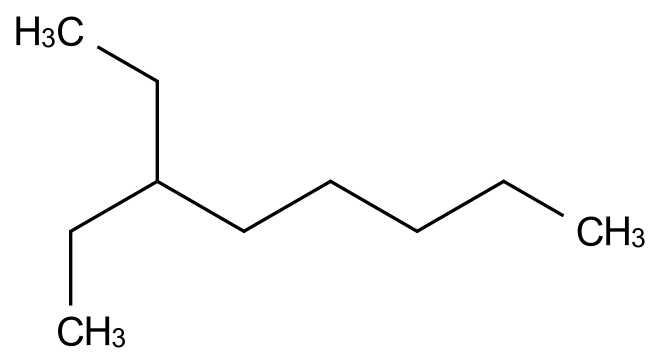

In [6]:
indigo.setOption("render-output-format", "svg")
img = renderer.renderToBuffer(
    obj=mol,
)
display(SVG(img))

### Write a molecular structure to a file

In [5]:
indigo.setOption("render-output-format", "png")
mol.layout()
renderer.renderToFile(
    obj=mol,
    filename="mol.png",
)

## Draw a grid of molecules

### Set up an array of molecules

In [7]:
names = [
    "methane",
    "butene",
    "3-ethyl-octane",
    "3,5-diethyl-octane",
    "3-(2,4-dimethyl-pentyl)-octane",
    "cyclooctane",
    "3-methyl-5-ethyl-cyclooctane",
    "cyclododeca-1,3,5,7,9,11-hexaene",
]

array = indigo.createArray()
for n in names:
    this_mol = indigo.nameToStructure(n)
    this_mol.layout()
    this_mol.setProperty("grid-comment", n)
    array.arrayAdd(this_mol)

indigo.setOption("render-grid-title-property", "grid-comment")
indigo.setOption("render-grid-margins", "20, 10")
indigo.setOption("render-grid-title-offset", "5")

### Write a grid of molecules to a file

In [8]:
indigo.setOption("render-output-format", "png")
renderer.renderGridToFile(
    objects=array,
    refatoms=None,
    ncolumns=4,
    filename="structures.png",
)

### Display a grid of molecular structures in the notebook as a PNG

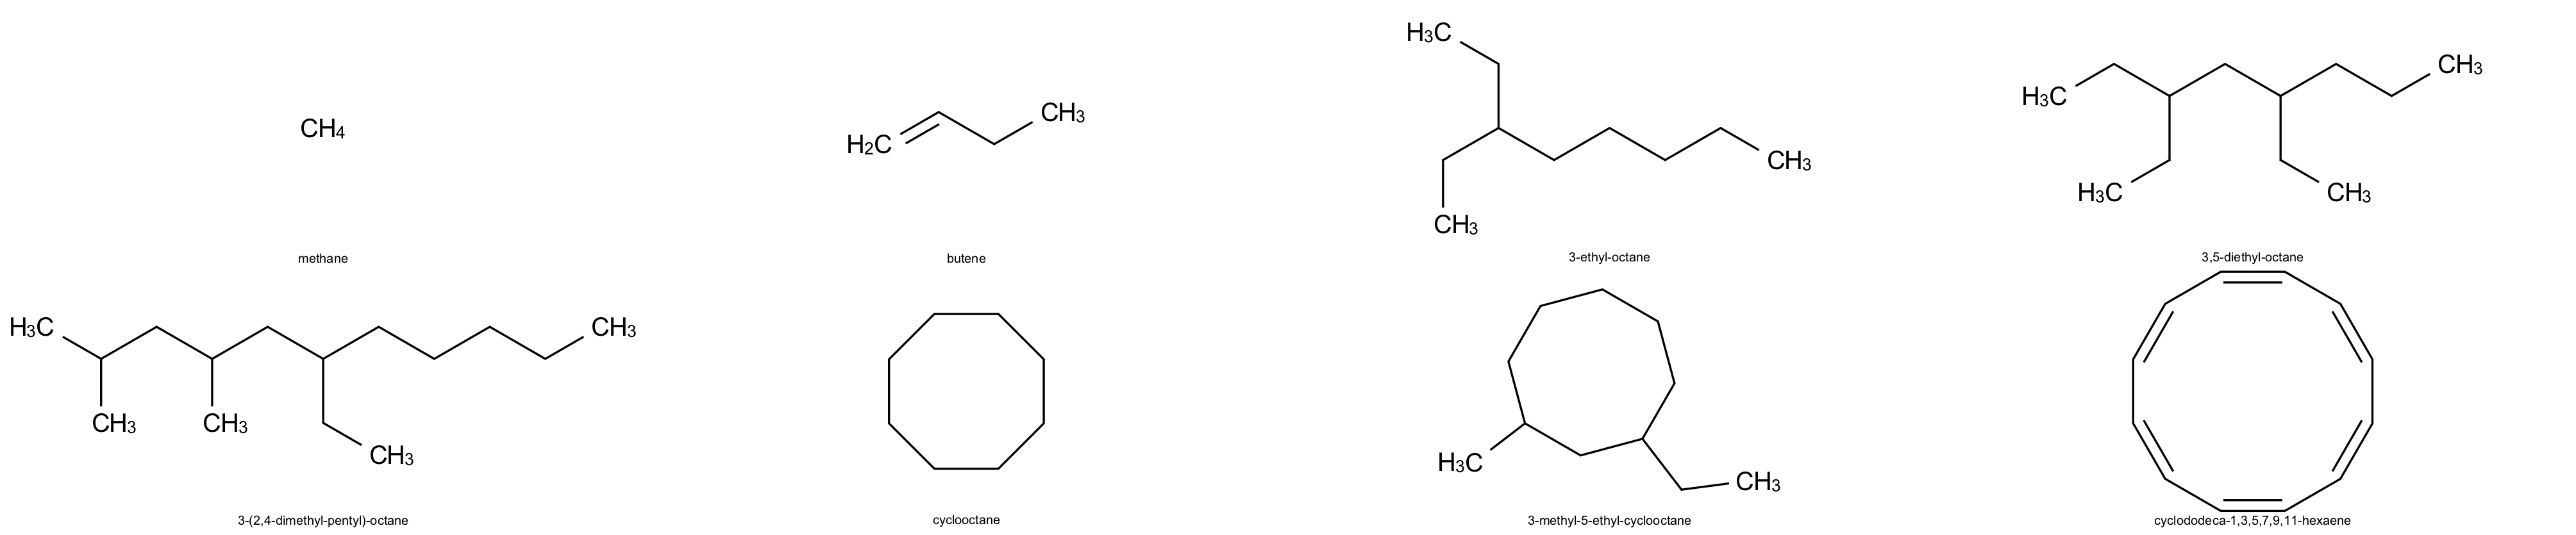

In [9]:
indigo.setOption("render-output-format", "png")
img_grid_png = renderer.renderGridToBuffer(
    objects=array,
    refatoms=None,
    ncolumns=4,
)
display(Image(img_grid_png))

### Display a grid of molecular structures in the notebook as an SVG

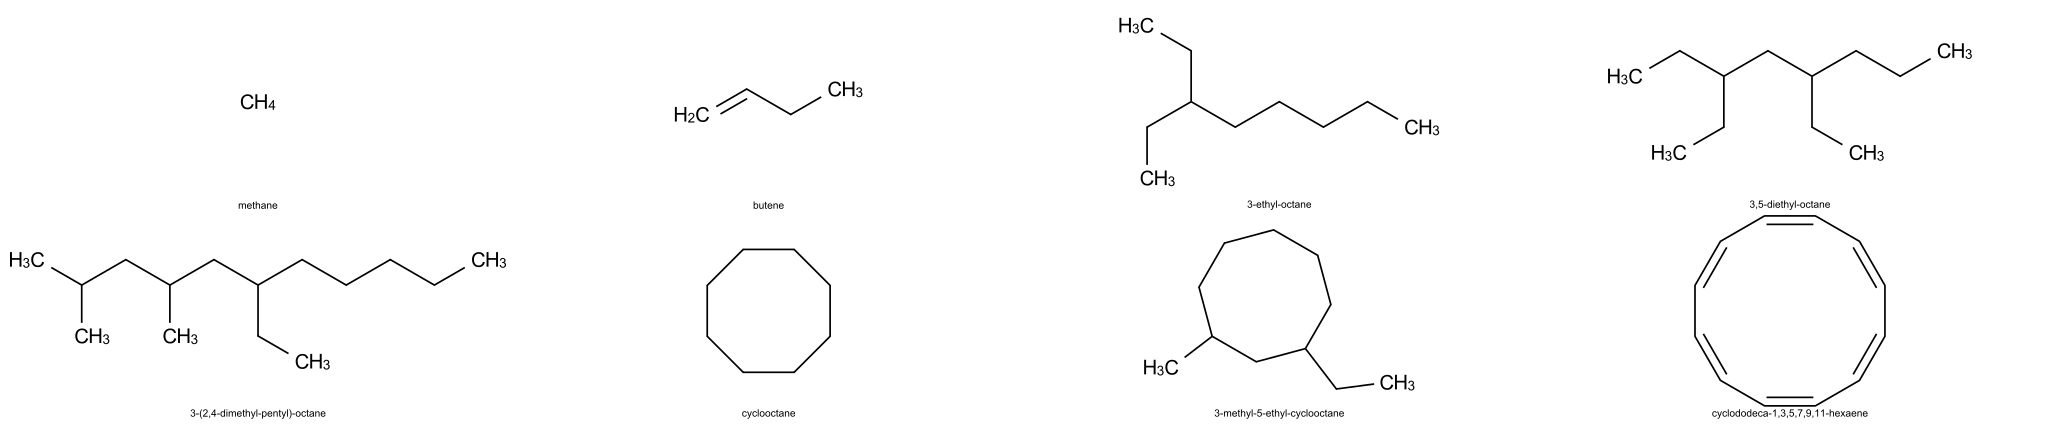

In [10]:
indigo.setOption("render-output-format", "svg")
img_grid = renderer.renderGridToBuffer(
    objects=array,
    refatoms=None,
    ncolumns=4,
)
display(SVG(img_grid))